In [1]:
%load_ext autoreload
%autoreload 2
import os
from tqdm import tqdm
from penetration_depth import mask_analysis, overimposed_img, prepare_data_prism
from penetration_depth.helpers import load_plot_parameters
# import matplotlib
# matplotlib.use('Agg')

In [14]:
path_data = r'F:\PD_test'
# measurements_types = [r'0_overimposition', r'100+x', r'45_overimposition', r'90_overimposition', r'splitted']
measurements_types = [r'0_overimposition']
wavelength = '600nm'
metric = 'mean'
parameters = ['depolarization', 'retardance', 'azimuth_iv', 'azimuth_sd']
parameters_save = ['depolarization', 'retardance', 'azimuth']

In [18]:
data_measurement, data_to_clean = mask_analysis.load_data(path_data, measurements_types, wavelength, parameters_save)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.92s/it]


In [23]:
for measurements_type in tqdm(measurements_types):
    mask_analysis.generate_plots(path_data, data_measurement[measurements_type], measurements_type, wavelength, Flag = False)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:11<00:00, 11.60s/it]


In [24]:
for measurements_type in tqdm(measurements_types):
    combined_data_per_thickness = mask_analysis.create_output_pickle(data_measurement[measurements_type], parameters, 
                                                                     path_data, measurements_type, wavelength)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.12it/s]


In [26]:
mask_analysis.save_data_prism(measurements_types, path_data, wavelength, parameters)

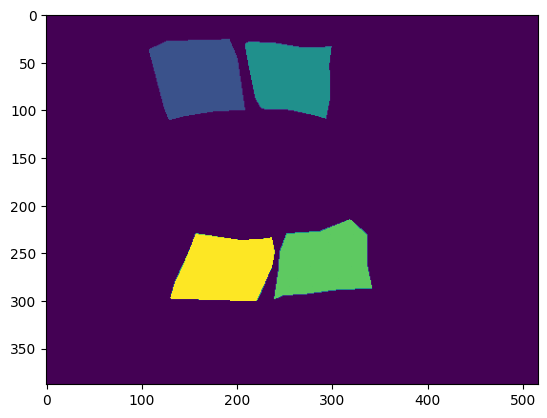